In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = data.DataReader("DELTA.BK","yahoo","2020-01-01","2020-12-31")
close = df['Close']
adj_close = df["Adj Close"]

In [3]:
print(close.describe())

count    243.000000
mean     113.310700
std      100.361234
min       30.000000
25%       52.125000
50%       59.000000
75%      156.250000
max      684.000000
Name: Close, dtype: float64


In [4]:
print(adj_close.describe())

count    243.000000
mean     113.014574
std      100.538013
min       30.000000
25%       51.120623
50%       58.750000
75%      156.250000
max      684.000000
Name: Adj Close, dtype: float64


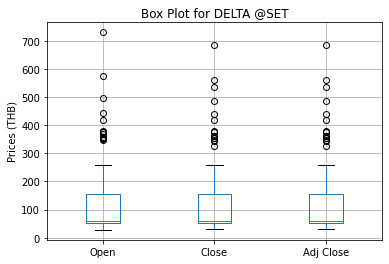

In [5]:
boxplot = df.boxplot(column=["Open","Close","Adj Close"])
boxplot.plot()
plt.title("Box Plot for DELTA @SET")
plt.ylabel("Prices (THB)")
plt.show()

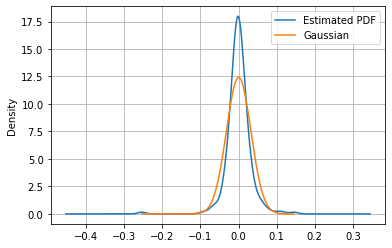

In [6]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

ptt = data.DataReader("PTT.BK", "yahoo", "2020-01-01", "2020-12-31")
adj_close = ptt['Adj Close']
simple_ret = adj_close.pct_change(1).dropna()
ax = simple_ret.plot.kde()
# Generate Kernel Density Estimate plot using Gaussian kernels.
# In statistics, kernel density estimation (KDE) is a non-parametric way to # estimate the probability density function (PDF) of a random variable.
# This function uses Gaussian kernels and includes
# automatic bandwidth determination.
mu = simple_ret.mean()
std = simple_ret.std(ddof=1)
x = np.linspace(simple_ret.min(), simple_ret.max(), 10000)

pdf = stats.norm.pdf(x, loc=mu, scale=std)
plt.plot(x, pdf)
plt.grid()
plt.legend(["Estimated PDF", "Gaussian"])
plt.show()

In [7]:
 stat,p_value = stats.shapiro(simple_ret)
print(f"The Shapiro-Wilk test yields statistics: {stat} with the p- value: {p_value}")

The Shapiro-Wilk test yields statistics: 0.8241921663284302 with the p- value: 7.574961119549228e-16


In [8]:
name5 = ["PTT", "ADVANC", "INTUCH", "DELTA", "KBANK"] 
from pandas_datareader import data
import pandas as pd
set5 = dict()
for stock in name5:
    df = data.DataReader(f"{stock}.BK", "yahoo", "2020-01-01", "2020-12-31") 
    ret = df['Adj Close'].pct_change(1).dropna()
    set5[stock] = ret
set5 = pd.DataFrame(set5)
print(set5.cov())

             PTT    ADVANC    INTUCH     DELTA     KBANK
PTT     0.001032  0.000254  0.000272  0.000259  0.000592
ADVANC  0.000254  0.000284  0.000243  0.000195  0.000209
INTUCH  0.000272  0.000243  0.000351  0.000213  0.000245
DELTA   0.000259  0.000195  0.000213  0.003296  0.000213
KBANK   0.000592  0.000209  0.000245  0.000213  0.001207


In [9]:
price = df.Close
ret = price.pct_change(1)
log_ret = np.log(price) - np.log(price.shift(1))
ret = ret.dropna()
log_ret = log_ret.dropna()
day_in_year = 365
print(f"Annualized Simple Return Mean: {day_in_year * ret.mean() * 100:0.3f}%") 
print(f"Annualized Log Return Mean: {day_in_year * log_ret.mean()*100:0.3f}%")

Annualized Simple Return Mean: -24.358%
Annualized Log Return Mean: -46.200%


In [10]:
vol_ret = ret.std(ddof=1) * np.sqrt(day_in_year)
vol_log_ret = log_ret.std(ddof=1) * np.sqrt(day_in_year)
print(f"Annualized Volatility of Simple Return Mean: {vol_ret * 100:0.3f}%") 
print(f"Annualized Volatility of Log Return Mean: {vol_log_ret*100:0.3f}%")

Annualized Volatility of Simple Return Mean: 66.398%
Annualized Volatility of Log Return Mean: 66.147%


In [11]:
high = df.High
low = df.Low
vol_range = (np.log(high/low)**2).mean()
vol_range = vol_range/(4*np.log(2))
vol_range = np.sqrt(vol_range)
vol_range = np.sqrt(day_in_year) * vol_range
print(f"Annualized Range Volatility of Price: {vol_range * 100:0.3f}%")

Annualized Range Volatility of Price: 43.629%
